# Registering Brain Scans Using Control Points

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import PiecewiseAffineTransform, warp
import numpy as np

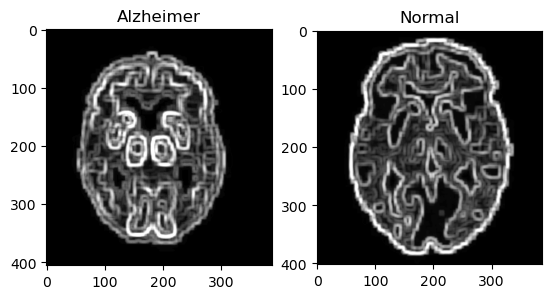

In [2]:
alzheimer = cv2.imread("./images/alzheimerBrain.png")
normal = cv2.imread("./images/normalBrain.png")

fig, axs = plt.subplots(1, 2)
axs[0].imshow(alzheimer)
axs[0].set_title('Alzheimer')
axs[1].imshow(normal)
axs[1].set_title('Normal')
plt.show()

In [3]:
alzheimer_points = pd.read_excel("./images/brainControlPoints.xlsx", sheet_name='alzheimerPts', header=None).to_numpy().astype(np.uint16)
normal_points = pd.read_excel("./images/brainControlPoints.xlsx", sheet_name='normalPts', header=None).to_numpy().astype(np.uint16)

Let's see where the control points are located.

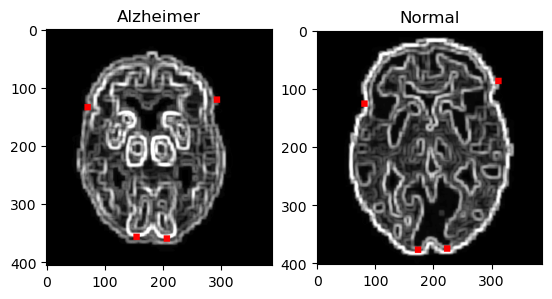

In [4]:
for i in range(len(alzheimer_points)):
    x, y = alzheimer_points[i]
    alzheimer[y-5:y+6, x-5:x+6] = np.array((255, 0, 0))

for i in range(len(normal_points)):
    x, y = normal_points[i]
    normal[y-5:y+6, x-5:x+6] = np.array((255, 0, 0))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(alzheimer)
axs[0].set_title('Alzheimer')
axs[1].imshow(normal)
axs[1].set_title('Normal')
plt.show()

We can create a geometric transformation using control points with the [getAffineTransform()](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga8f6d378f9f8eebb5cb55cd3ae295a999) function. The function calculates an affine transform from three pairs of the corresponding points.

In [5]:
transformation_matrix = cv2.getAffineTransform(np.float32(alzheimer_points[1:4]), np.float32(normal_points[1:4]))
transformation_matrix

array([[ 1.03631113e+00,  4.69772815e-03,  6.79241432e+00],
       [-1.07373893e-01,  1.16638429e+00, -2.26719484e+01]])

Now, we can apply the affine transformation with the [warpAffine()](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) function.

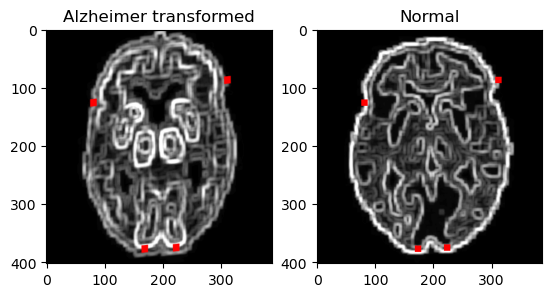

In [6]:
alzheimer_transformed = cv2.warpAffine(alzheimer, transformation_matrix, (normal.shape[1], normal.shape[0]))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(alzheimer_transformed, cmap='gray')
axs[0].set_title('Alzheimer transformed')
axs[1].imshow(normal, cmap='gray')
axs[1].set_title('Normal')
plt.show()

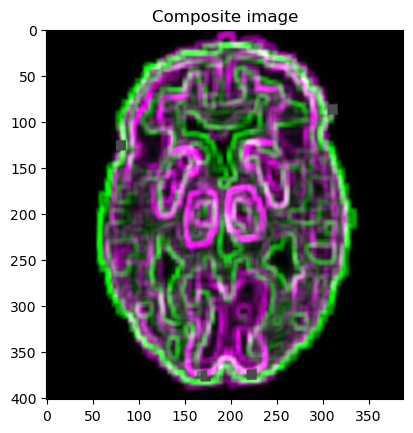

In [8]:
alzheimer_gray = cv2.cvtColor(alzheimer_transformed, cv2.COLOR_RGB2GRAY)
normal_gray = cv2.cvtColor(normal, cv2.COLOR_RGB2GRAY)

brain = np.dstack((alzheimer_gray,
                    normal_gray,
                    alzheimer_gray))

plt.imshow(brain)
plt.title("Composite image")
plt.show()